In [ ]:
#@title Define Sample Space
horizontal_board = [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],
                    ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'],
                    ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
                    ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'],
                    ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'],
                    ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'],
                    ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'],
                    ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10'],
                    ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10'],
                    ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']]

vertical_board = [['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1'],
                  ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2', 'J2'],
                  ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3', 'J3'],
                  ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4', 'J4'],
                  ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5', 'J5'],
                  ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6', 'J6'],
                  ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7', 'J7'],
                  ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8', 'J8'],
                  ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9', 'J9'],
                  ['A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'I10', 'J10']]

heat_map = [['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#']]


letter_table = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4,
                "F": 5, "G": 6, "H": 7, "I": 8, "J": 9}

ship_lengths = {"Aircraft Carrier": 5, "Battleship": 4, "Cruiser": 3,
                 "Submarine": 3, "Patrol_boat": 2}


In [ ]:
#@title Define Important Classes and Functions
import math

class ship_class:
  def __init__(self, battleship_name, battleship_length):
    self.battleship_name = battleship_name
    self.battleship_length = battleship_length
    self.ship_arrangements = []
    self.total_combinations = 0
    self.current_bits = 0
    self.entropy_term = 0
    self.hit_search_space = []
    self.is_sunk = False
    self.my_probability = 0

  def total_options(self):
      #find total arrangements horizontally
      for row in horizontal_board:
        window_start = 0
        window_end = self.battleship_length
        for options in range(11-self.battleship_length):
          space = row[window_start:window_end]
          window_start += 1
          window_end += 1
          self.ship_arrangements.append(space)

      #find total arrangements vertically
      for row in vertical_board:
        window_start = 0
        window_end = self.battleship_length
        for options in range(11-self.battleship_length):
          space = row[window_start:window_end]
          window_start += 1
          window_end += 1
          self.ship_arrangements.append(space)

      self.total_combinations += len(self.ship_arrangements)

  def is_hit(self, hit_space):
    # if ship is hit, narrow down search space to only arrangements
    # that contain the space that registered a hit
    global total_ship_arrangements
    ship_positions = all_ship_arrangements.get(self.battleship_name)
    targets = []
    for positions in ship_positions:
      if hit_space in positions:
        targets.append(positions)

    # clear search space and populate with the only available arrangements
    del all_ship_arrangements[self.battleship_name]
    all_ship_arrangements[self.battleship_name] = targets
    adjustment_factor = len(targets)

    # return an adjustment factor to change total_arrangements to amount of targets
    return adjustment_factor


  def sunk(self):
    self.is_sunk = True
    del all_ship_arrangements[self.battleship_name]

  def remove_from_search_space(self, player_move):
    global total_ship_arrangements
    ship_positions = all_ship_arrangements.get(self.battleship_name)
    for i in range(3):
      for positions in ship_positions:
        if player_move in positions:
          ship_positions.remove(positions)
          total_ship_arrangements -= 1



def search_mode():
  weighted_spaces = {}

  for space in board:
    entropy = 0
    total_prob = 0
    for battleship_name in all_ship_arrangements:

      battleship_arrangements = all_ship_arrangements.get(battleship_name)
      #Find how many ship arrangements are in the space
      num_ships_in_space = 0

      for each_arrangement in battleship_arrangements:
        if space in each_arrangement:
          num_ships_in_space += 1

      #Calculate the entropy of each space. E[X] where X is the chance of success and failure
      #Because X changes consistently due to the different spaces, a binomial experiment
      #is not applicable

      if num_ships_in_space > 0:
        #Calculate the info gained if the space leads to a hit
        hit_prob = num_ships_in_space / total_ship_arrangements
        hit_info = math.log(1/hit_prob, 2)
        entropy += hit_info * hit_prob


        #Calculate the info gained if the space leads is a miss
        miss_prob = 1 - hit_prob
        if miss_prob > 0:
          miss_info = math.log(1/miss_prob, 2)
          entropy += miss_info * miss_prob

        total_prob += (hit_prob + miss_prob)

        #save expected information of space in dictionary
        weighted_spaces[space] = entropy

  #find best space
  Best_space = max(weighted_spaces, key=weighted_spaces.get)
  Highest_info = weighted_spaces[Best_space]

  #search if there are other equally favorable spaces
  top_moves = [k for k, v in weighted_spaces.items() if v == Highest_info]
  one_of_top_moves = len(top_moves) - 1

  #randomnly select one of these top spaces
  Best_space = top_moves[random.randint(0,one_of_top_moves)]

  suggested_move = {Best_space:weighted_spaces[Best_space]}

  return suggested_move, weighted_spaces



# TO DO:
1. Find entropy of each distribution and calculate how uncertain each one is
2. Observe what happens if we use parity! --> see effect on graphs
3. Explain why grouping your shots isn't the best strategy using mathematics! Explain why spreading them is better using graphs!
4. Graph normal distribution of each graph

Occurences: [0, 0, 0, 47, 79, 99, 93, 50, 47, 48, 55, 48, 46, 59, 46, 47, 45, 46, 58, 34, 30, 21, 2, 0, 0, 0, 0, 0, 0, 0] 
ENTROPY: 4.1731736115972256
MEAN: 11.691 
STANDARD DEVIATION: 5.309398149386492


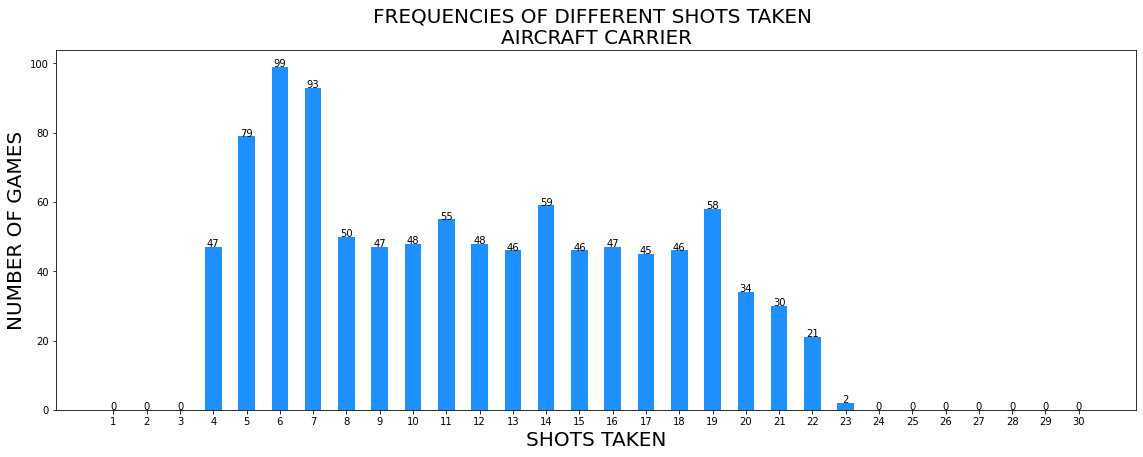

In [ ]:
#@title Aircraft Carrier Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 31):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  board =  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
            'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
            'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
            'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  heat_map = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
              'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
              'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
              'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
              'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
              'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
              'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
              'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
              'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
              'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  all_ship_arrangements = {}


  Aircraft_carrier = ship_class("Aircraft_carrier", 5)
  Aircraft_carrier.total_options()
  all_ship_arrangements["Aircraft_carrier"] = Aircraft_carrier.ship_arrangements
  total_ship_arrangements = 120
  trial_target = Aircraft_carrier.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

  #print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Aircraft_carrier.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Aircraft_carrier.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence



list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \nAIRCRAFT CARRIER', fontsize=20)
plt.show()



Occurences: [0, 0, 3, 39, 47, 65, 63, 67, 45, 54, 52, 54, 33, 36, 47, 51, 49, 35, 34, 24, 36, 39, 38, 32, 35, 22, 0, 0, 0, 0] 
ENTROPY: 4.484396578559418
MEAN: 13.678 
STANDARD DEVIATION: 6.424919890208406


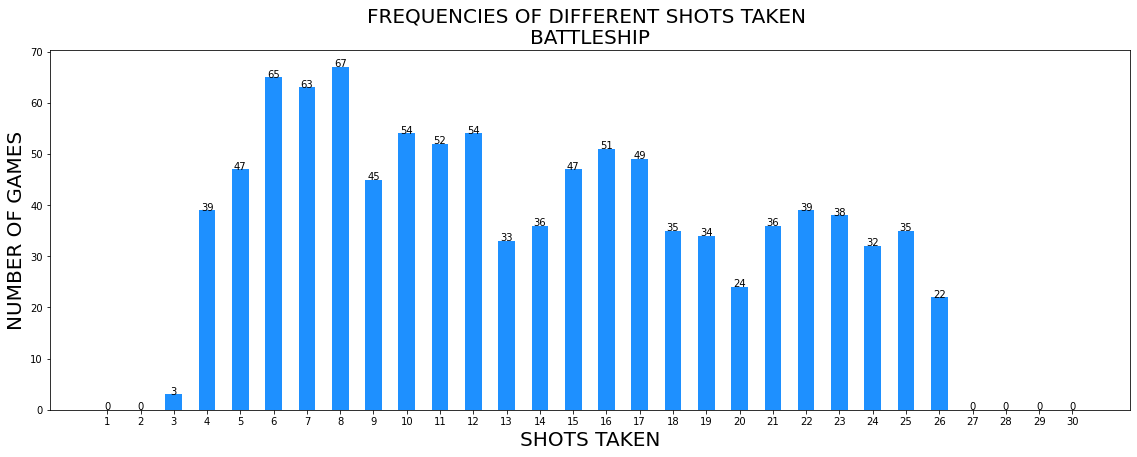

In [ ]:
#@title Battleship Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 31):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  board =  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
            'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
            'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
            'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  heat_map = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
              'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
              'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
              'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
              'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
              'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
              'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
              'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
              'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
              'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  all_ship_arrangements = {}


  Battleship = ship_class("Battleship", 4)
  Battleship.total_options()
  all_ship_arrangements["Battleship"] = Battleship.ship_arrangements
  total_ship_arrangements = 140
  trial_target = Battleship.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

  #print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Battleship.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Battleship.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence




list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \nBATTLESHIP', fontsize=20)
plt.show()

Occurences: [0, 0, 13, 30, 31, 25, 35, 41, 38, 40, 42, 53, 35, 26, 38, 18, 38, 22, 32, 37, 28, 30, 25, 28, 34, 26, 22, 22, 23, 16, 18, 20, 22, 27, 18, 12, 12, 10, 5, 2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0] 
ENTROPY: 5.1348901624135
MEAN: 18.573 
STANDARD DEVIATION: 9.73259443285265


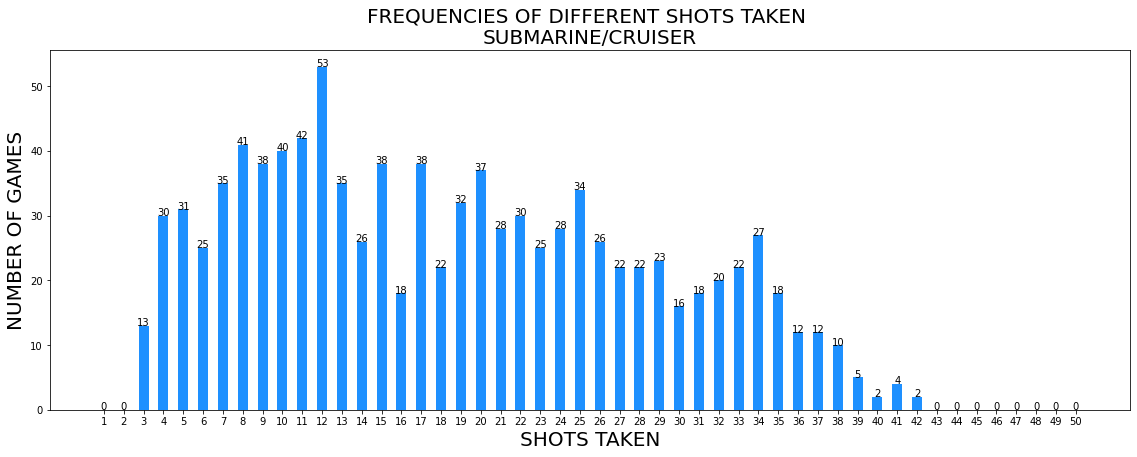

In [ ]:
#@title Cruiser/Submarine Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 51):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  board =  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
            'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
            'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
            'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  heat_map = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
              'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
              'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
              'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
              'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
              'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
              'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
              'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
              'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
              'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  all_ship_arrangements = {}


  Cruiser = ship_class("Cruiser", 3)
  Cruiser.total_options()
  all_ship_arrangements["Cruiser"] = Cruiser.ship_arrangements
  total_ship_arrangements = 160

  trial_target = Cruiser.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

  #print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Cruiser.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Cruiser.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence


list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")


probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \nSUBMARINE/CRUISER', fontsize=20)
plt.show()

Occurences: [0, 7, 14, 17, 20, 25, 22, 24, 19, 26, 23, 19, 21, 24, 19, 28, 23, 22, 20, 19, 22, 24, 20, 15, 26, 27, 27, 26, 18, 13, 10, 19, 21, 12, 16, 18, 19, 22, 14, 17, 19, 13, 18, 16, 16, 20, 16, 15, 13, 8, 8, 12, 14, 9, 8, 6, 4, 3, 3, 0, 1, 0, 0, 0] 
ENTROPY: 5.751805447137159
MEAN: 26.672 
STANDARD DEVIATION: 14.907335263038952


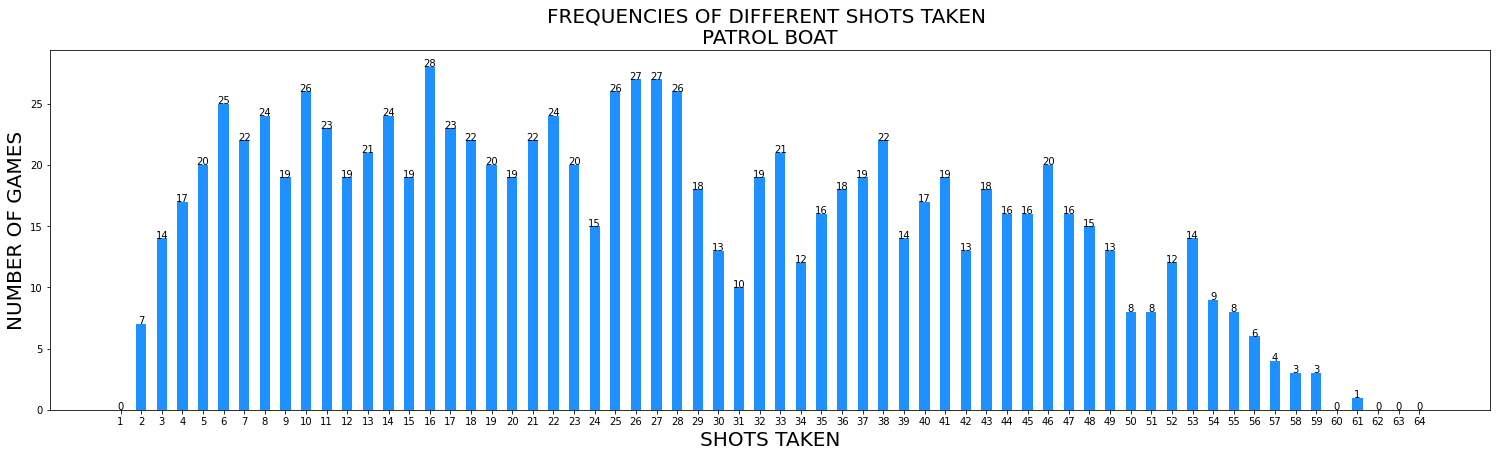

In [ ]:
#@title Patrol Boat Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 65):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  board =  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
            'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
            'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
            'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  heat_map = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
              'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
              'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
              'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
              'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
              'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
              'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
              'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
              'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
              'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']

  all_ship_arrangements = {}

  Patrol_boat = ship_class("Patrol_boat", 2)
  Patrol_boat.total_options()
  all_ship_arrangements["Patrol_boat"] = Patrol_boat.ship_arrangements
  total_ship_arrangements = 180

  trial_target = Patrol_boat.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

  #print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Patrol_boat.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Patrol_boat.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence


list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \nPATROL BOAT', fontsize=20)
plt.show()